In [1]:
# Dependencies
import numpy as np
import pandas as pd

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [4]:
# Import the sqlalchemy extract function.
from sqlalchemy import extract

# 1. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
results = session.query(Measurement.tobs).\
    filter(extract("month", Measurement.date) == 6).all()

In [5]:
# 2. Convert the June temperatures to a list.
jun_temps = list(np.ravel(results))

In [6]:
# 3. Create a DataFrame from the list of temperatures for the month of June. 
jun_df = pd.DataFrame(jun_temps, columns = ["June Temps"])
jun_df.head(10)

,June Temps
0,78.0
1,76.0
2,78.0
3,76.0
4,77.0
5,78.0
6,77.0
7,78.0
8,78.0
9,79.0


In [7]:
# 4. Calculate and print out the summary statistics for the June temperature DataFrame.
jun_df.describe()

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


In [ ]:
# 5. Return to your challenge instructions to compare your summary statistics

## D2: Determine the Summary Statistics for December

In [8]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
results = session.query(Measurement.tobs).\
    filter(extract("month", Measurement.date) == 12).all()

In [9]:
# 7. Convert the December temperatures to a list.
dec_temps = list(np.ravel(results))

In [10]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_df = pd.DataFrame(dec_temps, columns = ["December Temps"])
dec_df.head(10)

,December Temps
0,76.0
1,74.0
2,74.0
3,64.0
4,64.0
5,67.0
6,77.0
7,66.0
8,69.0
9,68.0


In [11]:
# 9. Calculate and print out the summary statistics for the December temperature DataFrame.
dec_df.describe()

,December Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


In [ ]:
# 10. Return to your challenge instructions to compare your summary statistics

## D3: Additional Analyses

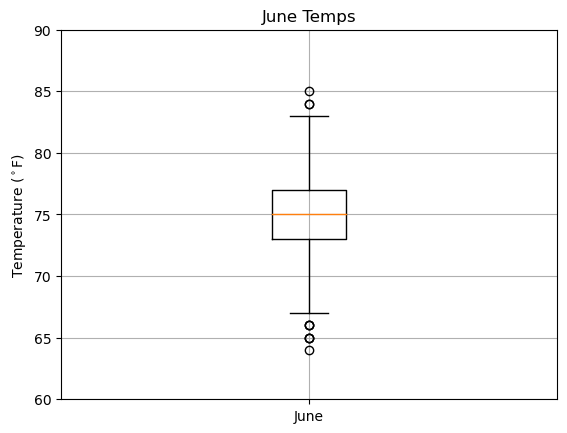

In [12]:
import matplotlib
import matplotlib.pyplot as plt
x_labels = ['June']
fig, ax = plt.subplots()
ax.boxplot(jun_df, labels = x_labels)
ax.set_title('June Temps')
ax.set_ylabel('Temperature ($^\circ$F)')
ax.set_yticks(np.arange(60, 91, step = 5))
ax.grid()
plt.show()

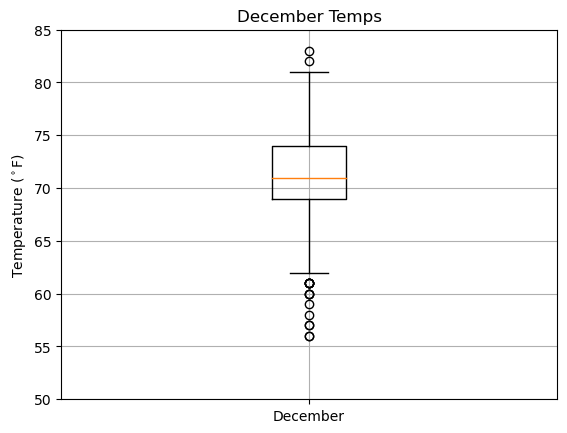

In [13]:
x_labels = ['December']
fig, ax = plt.subplots()
ax.boxplot(dec_df, labels = x_labels)
ax.set_title('December Temps')
ax.set_ylabel('Temperature ($^\circ$F)')
ax.set_yticks(np.arange(50, 86, step = 5))
ax.grid()
plt.show()

In [14]:
# EXTRA-1: Accumulate temperature and precipitation statistics over time.
results = session.query(extract("year", Measurement.date), extract("month", Measurement.date),\
                        func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs),\
                        func.min(Measurement.prcp), func.avg(Measurement.prcp), func.max(Measurement.prcp)).\
    filter(Measurement.station.not_in(["USC00518838", "USC00516128"])).\
    group_by(extract("year", Measurement.date), extract("month", Measurement.date)).all()

print(results)

[(2010, 1, 56.0, 69.07333333333334, 78.0, 0.0, 0.10317567567567568, 2.75), (2010, 2, 59.0, 67.14393939393939, 76.0, 0.0, 0.040390625, 0.87), (2010, 3, 60.0, 70.12994350282486, 77.0, 0.0, 0.07144508670520226, 0.74), (2010, 4, 61.0, 71.33714285714285, 78.0, 0.0, 0.07356321839080456, 3.99), (2010, 5, 65.0, 74.11167512690355, 81.0, 0.0, 0.05799999999999997, 1.06), (2010, 6, 69.0, 75.43147208121827, 85.0, 0.0, 0.021326530612244893, 0.41), (2010, 7, 68.0, 74.77248677248677, 81.0, 0.0, 0.0608152173913043, 0.62), (2010, 8, 67.0, 75.32367149758454, 87.0, 0.0, 0.04685990338164247, 0.43), (2010, 9, 67.0, 74.9948717948718, 87.0, 0.0, 0.05329896907216492, 0.89), (2010, 10, 65.0, 75.27860696517413, 84.0, 0.0, 0.06494999999999997, 1.91), (2010, 11, 63.0, 72.63157894736842, 80.0, 0.0, 0.08818681318681315, 1.34), (2010, 12, 58.0, 70.18848167539267, 78.0, 0.0, 0.4330687830687833, 4.95), (2011, 1, 57.0, 68.07179487179488, 77.0, 0.0, 0.1825906735751296, 8.81), (2011, 2, 56.0, 69.4034090909091, 77.0, 0.0, 

In [15]:
# Move results into a DataFrame.
extra1_df = pd.DataFrame(results, columns = ["Year", "Month", "Min Temp", "Avg Temp", "Max Temp",\
                                             "Min Prcp", "Avg Prcp", "Max Prcp"])
extra1_df

,Year,Month,Min Temp,Avg Temp,Max Temp,Min Prcp,Avg Prcp,Max Prcp
0,2010,1,56.0,69.073333,78.0,0.0,0.103176,2.75
1,2010,2,59.0,67.143939,76.0,0.0,0.040391,0.87
2,2010,3,60.0,70.129944,77.0,0.0,0.071445,0.74
3,2010,4,61.0,71.337143,78.0,0.0,0.073563,3.99
4,2010,5,65.0,74.111675,81.0,0.0,0.058000,1.06
...,...,...,...,...,...,...,...,...
87,2017,4,60.0,74.086957,83.0,0.0,0.287552,6.25
88,2017,5,65.0,75.761905,87.0,0.0,0.112657,1.62
89,2017,6,71.0,77.613497,83.0,0.0,0.077379,0.74
90,2017,7,69.0,79.092025,87.0,0.0,0.063793,1.19


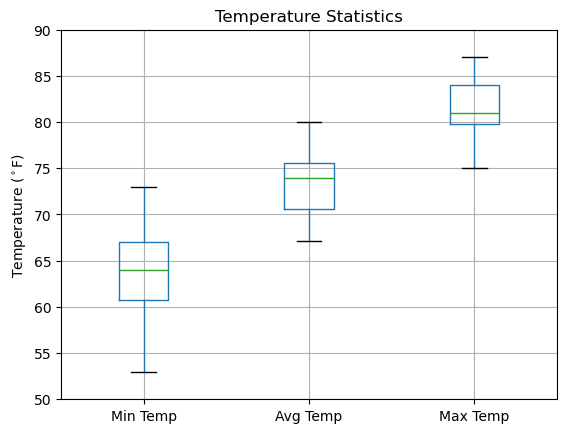

In [16]:
extra1_df.boxplot(column = ["Min Temp", "Avg Temp", "Max Temp"])
plt.title("Temperature Statistics")
plt.ylabel("Temperature ($^\circ$F)")
plt.yticks(np.arange(50, 91, step = 5))
plt.show()

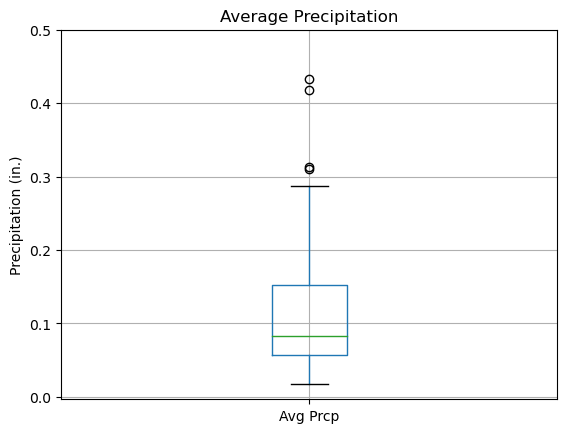

In [17]:
extra1_df.boxplot("Avg Prcp")
plt.title("Average Precipitation")
plt.ylabel("Precipitation (in.)")
plt.yticks(np.arange(0, 0.6, step = 0.1))
plt.show()

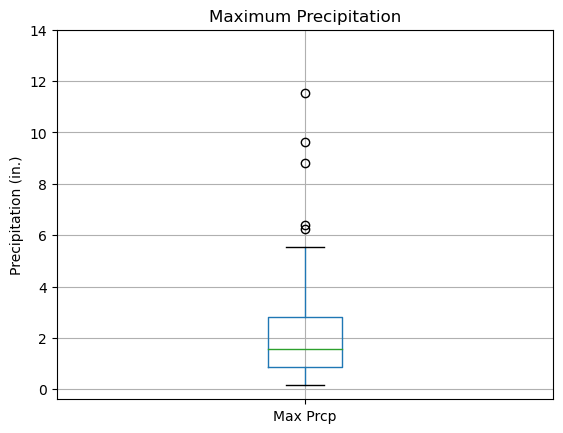

In [18]:
extra1_df.boxplot("Max Prcp")
plt.title("Maximum Precipitation")
plt.ylabel("Precipitation (in.)")
plt.yticks(np.arange(0, 15, step = 2))
plt.show()

In [19]:
# EXTRA-2: Aggregate the monthly averages for each coastal station by year.
results = session.query(extract("month", Measurement.date), Measurement.station,\
                        func.avg(Measurement.tobs), func.avg(Measurement.prcp)).\
    filter(Measurement.station.not_in(["USC00518838", "USC00516128"])).\
    group_by(extract("month", Measurement.date), Measurement.station).all()

print(results)

[(1, 'USC00511918', 66.85474860335195, 0.07039106145251395), (1, 'USC00513117', 69.28455284552845, 0.11632653061224496), (1, 'USC00514830', 71.4535519125683, 0.09631249999999997), (1, 'USC00517948', 68.4065934065934, 0.04627450980392156), (1, 'USC00519281', 67.92338709677419, 0.17907258064516146), (1, 'USC00519397', 67.7625, 0.040085836909871206), (1, 'USC00519523', 70.0042735042735, 0.12386363636363641), (2, 'USC00511918', 67.27160493827161, 0.04383647798742137), (2, 'USC00513117', 69.86607142857143, 0.15968609865470845), (2, 'USC00514830', 71.98064516129033, 0.14669172932330823), (2, 'USC00517948', 70.37121212121212, 0.09385964912280702), (2, 'USC00519281', 68.16371681415929, 0.17230088495575221), (2, 'USC00519397', 69.53424657534246, 0.0673611111111111), (2, 'USC00519523', 70.38888888888889, 0.14373205741626796), (3, 'USC00511918', 68.56547619047619, 0.0798170731707317), (3, 'USC00513117', 69.78225806451613, 0.2106451612903228), (3, 'USC00514830', 71.8288770053476, 0.120374999999999

In [20]:
# Move results into a DataFrame.
extra2_df = pd.DataFrame(results, columns = ["Month", "Station", "Avg Temp", "Avg Prcp"])
extra2_df

,Month,Station,Avg Temp,Avg Prcp
0,1,USC00511918,66.854749,0.070391
1,1,USC00513117,69.284553,0.116327
2,1,USC00514830,71.453552,0.096312
3,1,USC00517948,68.406593,0.046275
4,1,USC00519281,67.923387,0.179073
...,...,...,...,...
79,12,USC00514830,73.224719,0.154966
80,12,USC00517948,71.834862,0.152727
81,12,USC00519281,69.903226,0.244931
82,12,USC00519397,71.109524,0.075314


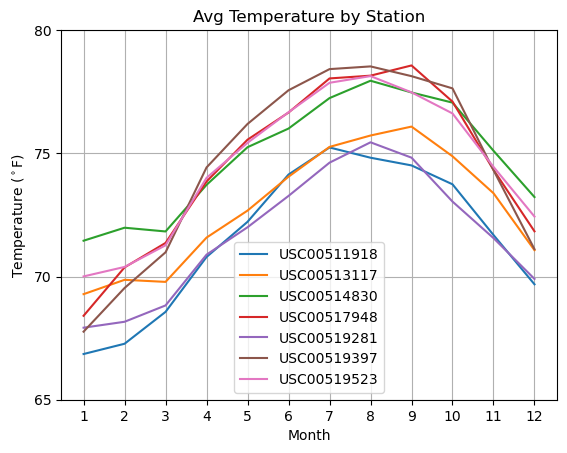

In [21]:
extra2_df.set_index("Month", inplace = True)
extra2_df.groupby("Station")["Avg Temp"].plot(legend = True)
plt.title("Avg Temperature by Station")
plt.ylabel("Temperature ($^\circ$F)")
plt.xticks(np.arange(1, 13, step = 1))
plt.yticks(np.arange(65, 81, step = 5))
plt.grid()
plt.show()

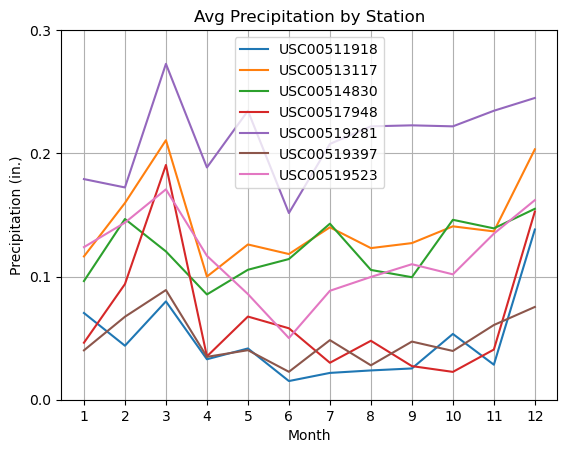

In [22]:
extra2_df.groupby("Station")["Avg Prcp"].plot(legend = True)
plt.title("Avg Precipitation by Station")
plt.ylabel("Precipitation (in.)")
plt.xticks(np.arange(1, 13, step = 1))
plt.yticks(np.arange(0, 0.4, step = 0.1))
plt.grid()
plt.show()